<a href="https://colab.research.google.com/github/Natasha617/-advanced-machine-learning/blob/main/Clustering_GM_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Генеративная модель на основе гауссовых смесей

Гауссовы смеси — естественное математическое обобщение алгоритма `K-means`. По сути, подход ищет не просто какие-то кучки вокруг формирующихся центроидов, а некоторую смесь многомерных нормальных распределений (по сути — тоже кучки вокруг средних со своими дисперсиями). Так как такой подход оценивает плотности распределений, то он часто используется в задачах KDE (kernel density estimation). В том числе, он может быть применен к задаче генерации: если есть плотность распределения, то можно семплировать и получать новые объекты. Давайте посмотрим на простейший пример решения такой задачи.

Работать будем опять-таки с `MNIST`. Так как модель оказывается крайне тяжеловесной, будем использовать «простой» набор данных. Визуализируем элементы этого набора данных (для наглядности)

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.data.shape

(1797, 64)

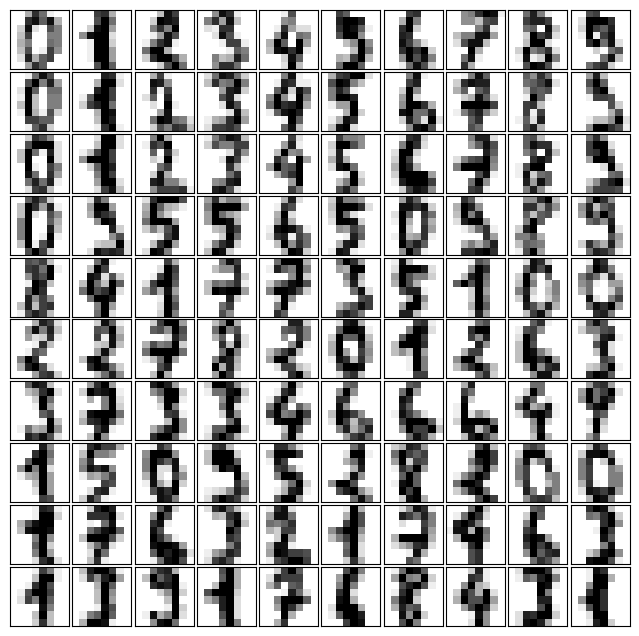

In [2]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits.data[i].reshape(8,8), cmap='binary')
    im.set_clim(0, 16)

Для того, чтобы обучение проходило быстрее имеет смысл снизить размерность пространства признаков. Произведите преобразования для всего набора данных помощи <code>PCA(n_components=0.99, svd_solver=='full')</code>.


In [3]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=0.99, svd_solver='full' )

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
data = pca.fit_transform(digits.data)

In [9]:
data.shape

(1797, 41)

Введите число полученных ГК

Обучим интересующую нас модель, подобрав гиперпараметр, отвечающий за число используемых компонент, минимизируя <a href="https://ru.wikipedia.org/wiki/Информационный_критерий_Акаике">информационный критерий Акаике</a>.

Для значений параметра <code>n_components</code> в диапазоне $[50,250)$ с шагом $10$ обучите модели <a href="https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html"><code>GaussianMixture</code></a> с параметрами, указанными в вашем задании. При помоши метода <code>.aic()</code> вычислите значение критерия каждой модели.

Введите значение <code>n_components</code> модели с наименьшим значением критерия Акаике.




In [11]:
from sklearn.mixture import GaussianMixture

In [14]:
for n in range(50,250,10):
  mix = GaussianMixture(n_components=n, covariance_type='full', random_state=11).fit(data)
  print(n,mix.aic(data) )

50 182557.33904829112
60 108399.29409495469
70 34585.30193041342
80 -15163.839854595077
90 -66676.19809977687
100 -105613.3518447153
110 -125937.67523147014
120 -152595.02108471259
130 -169840.87410280004
140 -172432.53436961246
150 -186414.49306565657
160 -186722.0997565391
170 -194791.12305576645
180 -195138.90799833392
190 -193894.09669711394
200 -185726.49901365873
210 -180329.04147098027
220 -174659.3984823383
230 -173674.8741362875
240 -165242.10267550265


In [15]:
mix = GaussianMixture(n_components=180, covariance_type='full', random_state=11).fit(data)

In [16]:
mix.converged_

True

In [18]:
sample = mix.sample(100)


In [30]:
import numpy as np

In [32]:
np.mean(sample[0])

-0.053363933948727814

In [41]:
round(np.mean(sample[0][:,0]),3)


-1.106

In [44]:
sample[0][:,0]

array([  7.20270419,  -4.34218323,  14.6535454 , -10.86200364,
       -13.47312676,  -4.39905816,  -6.3060942 ,  -8.85990151,
        -6.12816681, -14.09660633,  10.07480693,  -1.20711241,
         1.95560831,  -3.37203004, -20.09318001, -20.4032929 ,
        22.88362753,  24.72711399,   5.94418688,   9.8190448 ,
         8.74497517,  19.98026332,   8.5842652 ,   6.81692273,
         3.31033601, -21.79676006,  -4.70921174,  21.96224631,
         2.20221538,   6.55042977,   7.13467709,   6.96420208,
        -1.46187955,   8.97762256,   8.37924332,  10.1516103 ,
       -16.26298776, -19.20205531,  -2.2202837 ,  11.57842321,
       -17.95718029, -10.50107618, -20.44239588, -15.87561388,
       -25.39027718, -27.06581421,  -1.4760903 ,  23.10754224,
       -22.12263489, -12.19772808,  13.17277016,  14.06573932,
        -1.07643843,   5.15536255,   0.1062132 , -20.49174603,
        16.21942766,  11.46537488, -23.30005002,  -0.84017115,
        -1.50631428, -10.87099689,   8.25438384,   9.05

In [26]:
 img = pca.inverse_transform(sample[0][17])

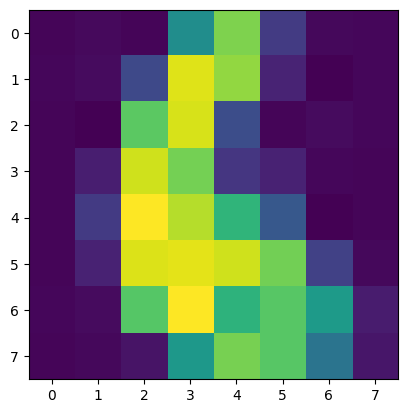

In [28]:
plt.imshow(img.reshape(8,8))

In [22]:
len(sample[0][0])

41

Обучите финальную модель на подобранном гиперпараметре. Проверьте, что обучение сошлось (поле <code>.converged_</code> модели).

In [ ]:
# < ENTER YOUR CODE HERE >

При помощи метода <code>.sample()</code> сгенерируйте $100$ новых объектов.

Введите выборочное среднее коориднаты с индексом $0$ сгенерированных объектов.

In [ ]:
# < ENTER YOUR CODE HERE >

При помоши метода <code>.inverse_transform()</code> класса <code>PCA</code> верните сгенерированные объекты в пространство исходных признаков.

In [ ]:
# < ENTER YOUR CODE HERE >

Визуализируйте полученные результаты. Введите номер изображения, соответствующего сгенерированному объекту с индексом $5$ (индексация начинается с нуля)

In [ ]:
# < ENTER YOUR CODE HERE >